# Load audio

In [7]:
import torchaudio
from helpers.transform import trim_audio
from helpers.path_utils import get_base_dir
from helpers.plot import plot_wavelet_spectrogram

AUDIO_NAME = "SAM-Summation Sound.wav"

base_dir = get_base_dir()
AUDIO_DIR = base_dir.joinpath("data", "stethos", "SAM", AUDIO_NAME)

audio, sample_rate = torchaudio.load(str(AUDIO_DIR))
print("Sample rate: ", sample_rate)

Sample rate:  4000


# Watch just a snippet

torch.Size([1, 480000]) torch.Size([1, 16000])


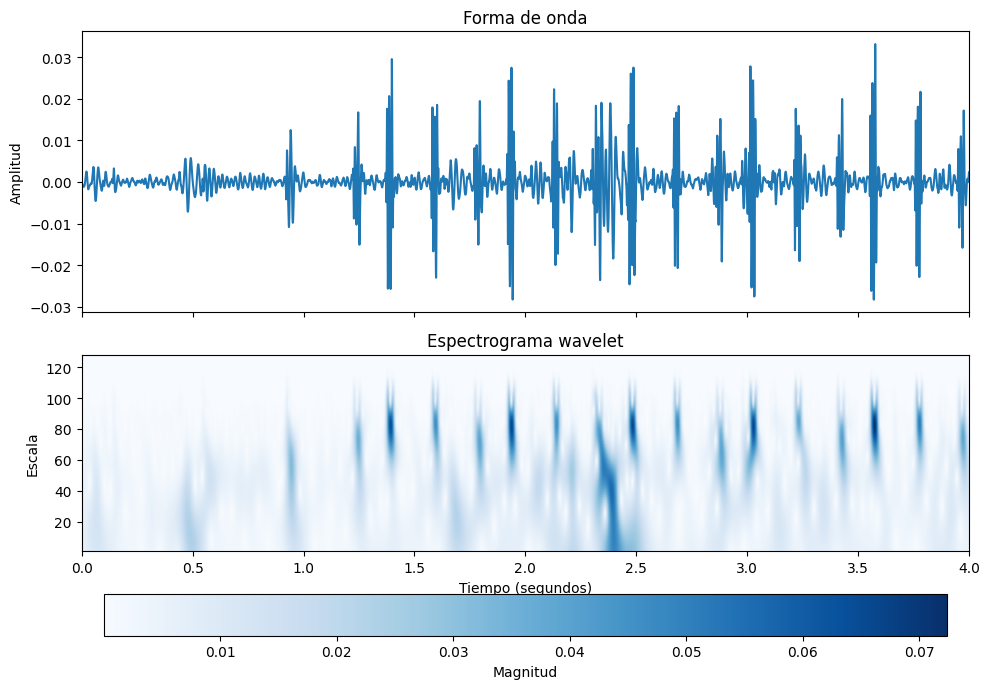

In [8]:
SNIPPET_STARTS = 0
SNIPPET_ENDS = 4

cut_starts = int(SNIPPET_STARTS * sample_rate)
cut_ends = int(SNIPPET_ENDS * sample_rate)

snippet = audio[:, cut_starts:cut_ends].clone()
print(audio.shape, snippet.shape)

plot_wavelet_spectrogram(snippet.squeeze(), sample_rate, downsample_factor=1)

# Trim the original one

torch.Size([1, 480000]) torch.Size([1, 476000]) torch.Size([1, 16000])


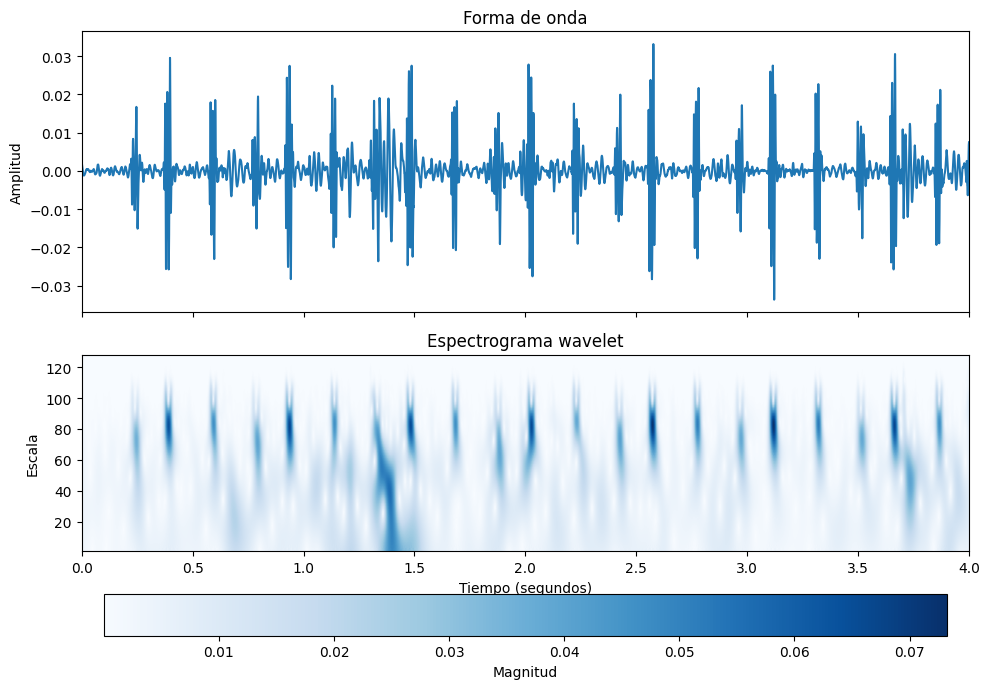

In [11]:
START_AT = 1
END_AT = None

trim = trim_audio(audio, sample_rate, START_AT, END_AT)

snippet_trim = trim[:, cut_starts:cut_ends].clone()
print(audio.shape, trim.shape, snippet_trim.shape)

plot_wavelet_spectrogram(snippet_trim.squeeze(), sample_rate, downsample_factor=1)

In [12]:
filename = AUDIO_DIR.stem
OUTPUT_DIR = base_dir.joinpath("data", "stethos", "SAM", f"{filename}-trim.wav")

torchaudio.save(str(OUTPUT_DIR), trim, sample_rate)